**Creating a ML model for recognizing hand written digits using a given dataset and mnist data set**

**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

**Fetching the train data set**

In [2]:
# Fetching the data set using pandas

mnist_train = pd.read_csv("digit_train.csv")

In [3]:
# To analyze the shape of the data (rows and columns)

mnist_train.shape

(42000, 785)

**To check if the data is balanced- i.e.- whether all unique values in label are preset in considerable rows**

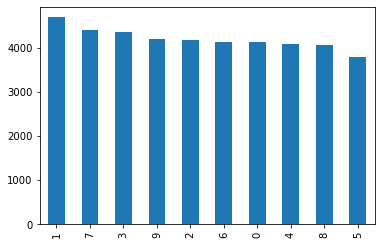

In [4]:
##Plotting the unique values of 'Label' column versus the number of rows

unique_value_count = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

Data is balanced as all unique values are present in significat number of rows

-------

**Dividing the data into X(feature) and y(label)**

In [5]:
X= mnist_train.drop(['label'],axis=1,inplace=False)
y= mnist_train['label']

In [6]:
## To check the index of the dastset

X.index

RangeIndex(start=0, stop=42000, step=1)

In [7]:
# We have verified the shape of X- which has one column less now

X.shape

(42000, 784)

In [8]:
# We have verified the shape of y- which has only one column

y.shape

(42000,)

**We will plot some of the rows to find out the hand written figure that it represents**

In [9]:
sample = X.iloc[5000:5020,:].values
sample_image= sample.reshape(560,28)

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

(-0.5, 27.5, 559.5, -0.5)

In [11]:
y.iloc[5000:5020]

5000    8
5001    7
5002    2
5003    6
5004    3
5005    1
5006    2
5007    6
5008    6
5009    6
5010    6
5011    4
5012    8
5013    1
5014    0
5015    7
5016    6
5017    2
5018    0
5019    3
Name: label, dtype: int64

**We will shuffle the X and y data so that the probability of presence of each unique value in both train and test increases**

In [12]:
shuffle_index= np.random.permutation(42000)
X,y= X.iloc[shuffle_index], y.iloc[shuffle_index]

In [13]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y.head()

25343    0
21416    0
41839    6
6089     0
39089    7
Name: label, dtype: int64

**Now we will bifurcate the X and y into train and test using sklearn libraray**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [16]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train.head()

25954    6
32915    8
25140    8
34939    5
16231    6
Name: label, dtype: int64

**We will try to develop a KNN CLASSIFIER model using K values from 1 to 25**

Importing Confusion matrix, Accuracy score and KNN classifier

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# We create 2 empty list for accuracy and error.
# Then using for loop we calculate the accuracy and error for K values from 1 to 25

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    err = 1-acc
    acc_list.append(acc)
    err_list.append(err)
    print("For k = {}, accuracy = {}".format(i,acc))
    print("For k = {}, error = {}".format(i,err))
    

For k = 1, accuracy = 0.9657142857142857
For k = 1, error = 0.03428571428571425
For k = 2, accuracy = 0.9628571428571429
For k = 2, error = 0.037142857142857144
For k = 3, accuracy = 0.9671428571428572
For k = 3, error = 0.03285714285714281
For k = 4, accuracy = 0.9660714285714286
For k = 4, error = 0.03392857142857142
For k = 5, accuracy = 0.9672619047619048
For k = 5, error = 0.03273809523809523
For k = 6, accuracy = 0.9671428571428572
For k = 6, error = 0.03285714285714281
For k = 7, accuracy = 0.9666666666666667
For k = 7, error = 0.033333333333333326
For k = 8, accuracy = 0.965952380952381
For k = 8, error = 0.03404761904761899
For k = 9, accuracy = 0.9648809523809524
For k = 9, error = 0.035119047619047605
For k = 10, accuracy = 0.9635714285714285
For k = 10, error = 0.03642857142857148
For k = 11, accuracy = 0.9627380952380953
For k = 11, error = 0.03726190476190472
For k = 12, accuracy = 0.9614285714285714
For k = 12, error = 0.03857142857142859
For k = 13, accuracy = 0.9616666

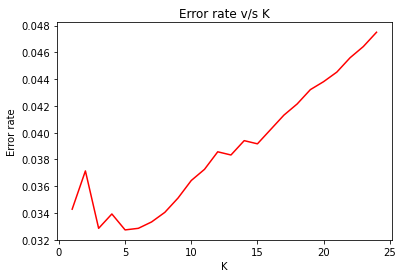

In [21]:
#Plot line chart for error rate from the error list populated in above line of code

plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

We can choose K=6 from the graph as it is an elbow point and have the lowest error rate

In [22]:
#Model building

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [23]:
#Model Evaluation

cm=confusion_matrix(y_test,y_pred)
cm

array([[807,   1,   0,   0,   0,   2,   2,   0,   0,   0],
       [  0, 955,   1,   0,   0,   0,   1,   2,   0,   0],
       [  6,  15, 805,   2,   0,   2,   3,  16,   1,   1],
       [  1,   3,   7, 793,   0,  10,   0,   5,   2,   2],
       [  2,   9,   0,   0, 802,   0,   2,   1,   0,  13],
       [  3,   1,   0,  12,   1, 710,   6,   1,   0,   7],
       [  3,   2,   0,   0,   0,   4, 829,   0,   0,   0],
       [  0,  15,   3,   0,   1,   0,   0, 871,   0,   8],
       [  1,  20,   2,  12,   3,  10,   7,   1, 749,  12],
       [  2,   2,   3,   3,   7,   2,   0,   9,   1, 803]], dtype=int64)

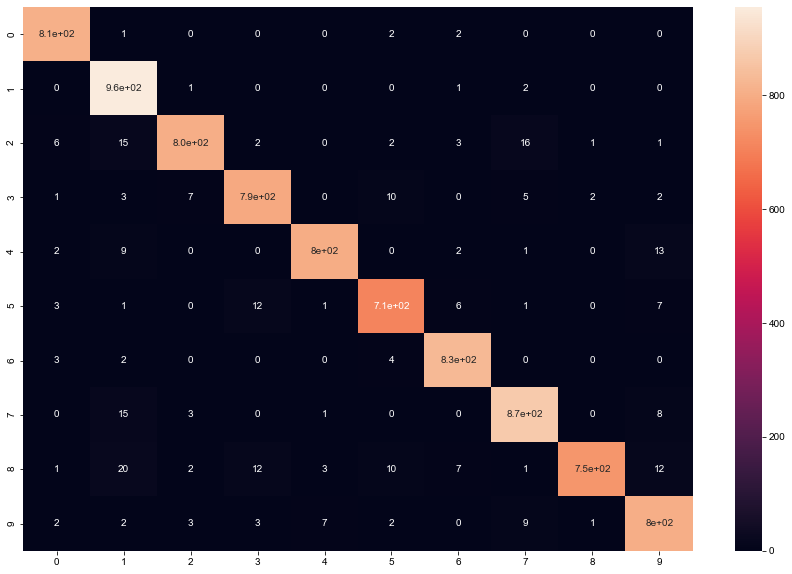

In [24]:
#plotting heatmap for confusin matrix

plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap= 'rocket',)
sns.set(font_scale=1.25)
plt.show()

In [25]:
#accuracy check

a=accuracy_score(y_test,y_pred)
print(a*100,'%')

96.71428571428572 %


**-----------------------------------------**%
**-----------------------------------------**%
**-----------------------------------------**%
**-----------------------------------------**%
**--------------------------------**

**Logistic Regression**

**Importing required Libraries**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

**We are using the MNIST data vbase avaiable on internet to train our model**

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [28]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

**From the MNIST database we select our X and y**

In [29]:
X,y= mnist['data'], mnist['target']

In [30]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**We will plot some of the rows to find out the hand written figure that it represents**

(-0.5, 27.5, 279.5, -0.5)

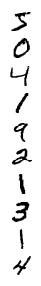

In [32]:
sample = X.iloc[0:10,:].values
sample_image= sample.reshape(280,28)
plt.figure(figsize=(10,5))
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [33]:
y[0:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**We will shuffle the X and y data so that the probability of presence of each unique value in both train and test increases**

In [34]:
shuffle_index= np.random.permutation(70000)
X,y= X.iloc[shuffle_index], y.iloc[shuffle_index]

**Now we will bifurcate the X and y into train and test using sklearn libraray**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [36]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
43237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y_train.head()

43237    9
10504    4
36528    5
41059    6
35084    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Using our training data we are trying to train a Logistic Regression model**

In [38]:
# Model Training
# Input is X_train and y_train

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
# Testing the model through predictions for X_test

Pr= lr.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
#printing the confusin matrix

cm= confusion_matrix(y_test, Pr)
cm

array([[1407,    0,    1,    2,    1,   14,   10,    2,    8,    1],
       [   0, 1517,    9,    6,    0,    4,    2,    5,   16,    4],
       [   7,   18, 1253,   19,   18,    5,   17,   24,   37,    6],
       [   8,    6,   39, 1233,    1,   42,    7,    5,   26,   11],
       [   4,    3,    4,    1, 1268,    1,   17,    6,   11,   49],
       [  20,    3,   10,   45,   18, 1063,   29,    5,   46,    8],
       [  10,    1,    6,    0,    4,   15, 1302,    2,    5,    1],
       [   2,    7,   17,    6,   12,    0,    0, 1359,    7,   55],
       [  17,   25,   20,   32,    6,   30,   18,    3, 1193,   17],
       [   8,    8,    5,   25,   40,    9,    0,   45,   16, 1270]],
      dtype=int64)

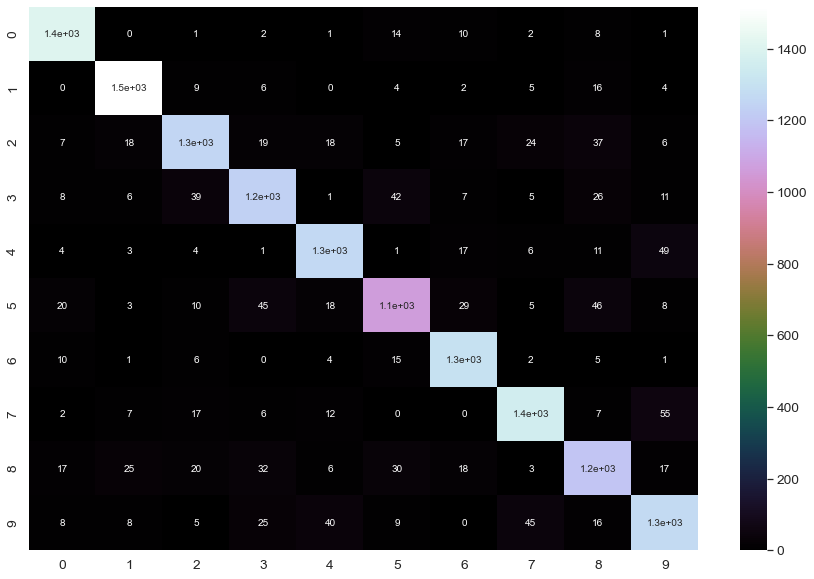

In [42]:
#plotting heatmap for confusion matrix


plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap= 'cubehelix')
sns.set(font_scale=1.25)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
#Checking the accuracy score(%)

accuracy= accuracy_score(y_test,Pr)
a=accuracy*100
print(a,'%')

91.89285714285714 %


Model Accuracy
 
KNN Classifier----------96.71%

Logistic Regression-----91.89%
